In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute
from qiskit.tools.visualization import plot_histogram
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

{'0010': 17, '0101': 19, '0001': 3704, '1011': 321, '1001': 20, '1111': 333, '0111': 319, '0110': 23, '1000': 328, '0000': 316, '1110': 3569, '1010': 23, '1100': 315, '1101': 20, '0011': 348, '0100': 325}


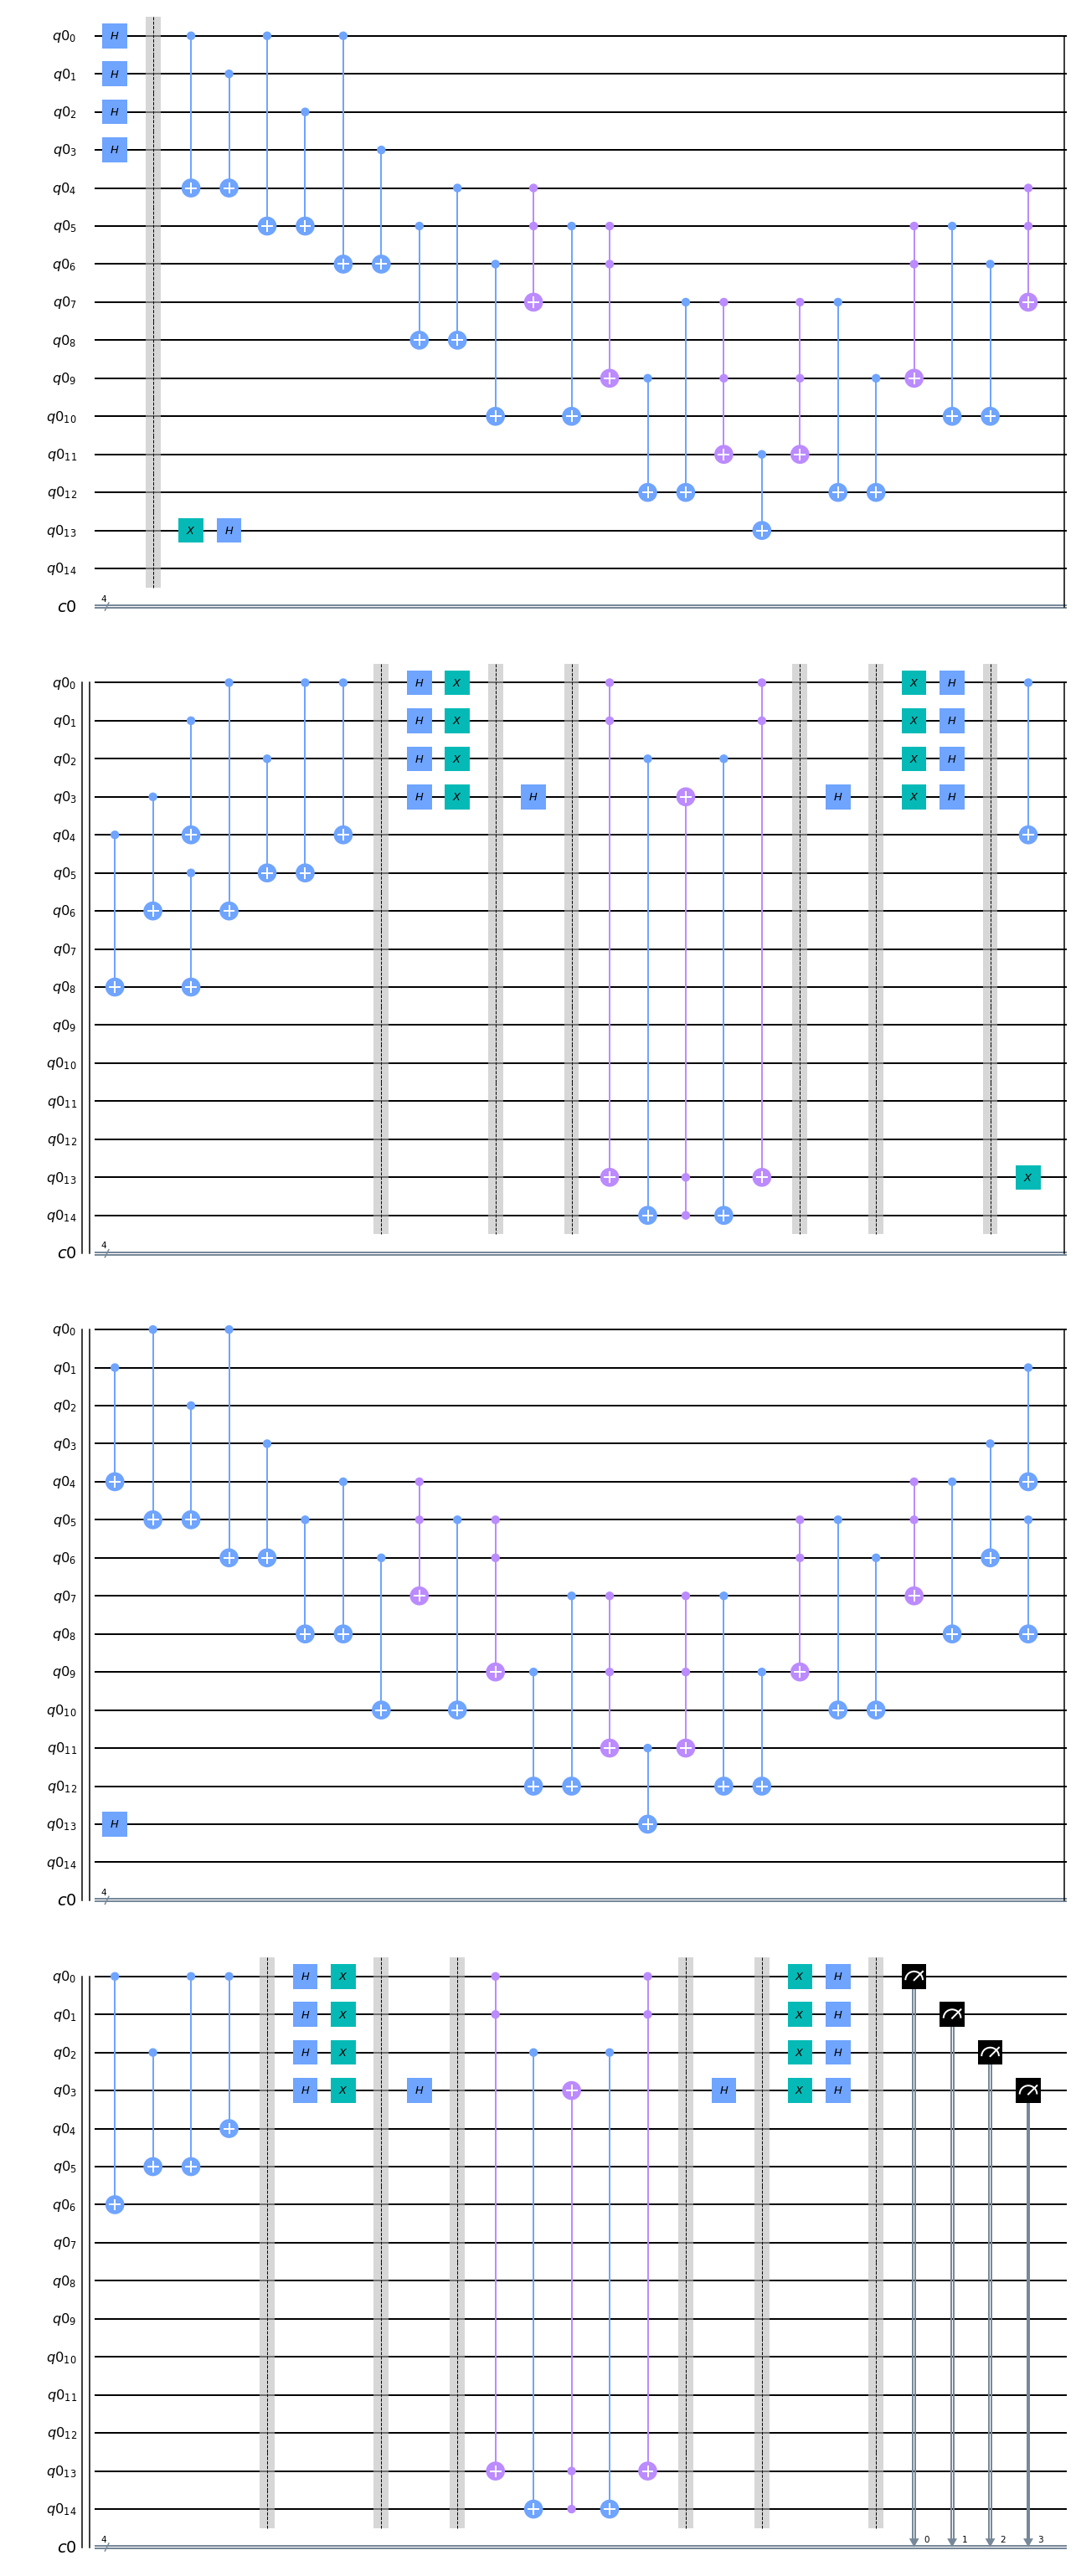

In [3]:
q = QuantumRegister(15)
c = ClassicalRegister(4)
qc = QuantumCircuit(q,c)

#cutedge checker
def ccheck(a, b, c): 
    qc.cx(q[a], q[c]) 
    qc.cx(q[b], q[c])

#half adder
#inputs: a,b 
#outputs: the sum output s and carry output c
def hadder(a,b,s,c):
    #XOR
    qc.cx(q[b], q[s])
    qc.cx(q[a], q[s])
    #AND
    qc.ccx(q[a], q[b], q[c])

#inverse operations
def iccheck(a, b, c): 
    qc.cx(q[b], q[c])
    qc.cx(q[a], q[c]) 
def ihadder(a,b,s,c):
    qc.ccx(q[a], q[b], q[c])
    qc.cx(q[a], q[s])
    qc.cx(q[b], q[s])

#initialization
qc.h(q[0:4])
qc.barrier()
for i in range(2):
    #step 3.1
    ccheck(0,1,4)
    ccheck(0,2,5)
    ccheck(0,3,6)

    #step 3.2
    hadder(4,5,8,7)
    hadder(5,6,10,9)
    hadder(7,9,12,11)

    # grover
    qc.x(q[13])
    qc.h(q[13])
    qc.cx(q[11],q[13])

    ihadder(7,9,12,11)
    ihadder(5,6,10,9)
    ihadder(4,5,8,7)

    iccheck(0,3,6)
    iccheck(0,2,5)
    iccheck(0,1,4)

    qc.barrier()
    qc.h(q[0])
    qc.h(q[1])
    qc.h(q[2])
    qc.h(q[3])
    qc.x(q[0])
    qc.x(q[1])
    qc.x(q[2])
    qc.x(q[3])
    qc.barrier()
    qc.h(q[3])
    qc.barrier()
    qc.ccx(q[0],q[1],q[13])
    qc.cx(q[2],q[14])
    qc.ccx(q[14],q[13],q[3])
    qc.cx(q[2],q[14])
    qc.ccx(q[0],q[1],q[13])
    qc.barrier()
    qc.h(q[3])
    qc.barrier()
    qc.x(q[0])
    qc.x(q[1])
    qc.x(q[2])
    qc.x(q[3])
    qc.h(q[0])
    qc.h(q[1])
    qc.h(q[2])
    qc.h(q[3])
    qc.barrier()
qc.measure(q[0:4], c[0:4])

backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=10000)
result = job.result()
count =result.get_counts()
print(count)
qc.draw(output='mpl')

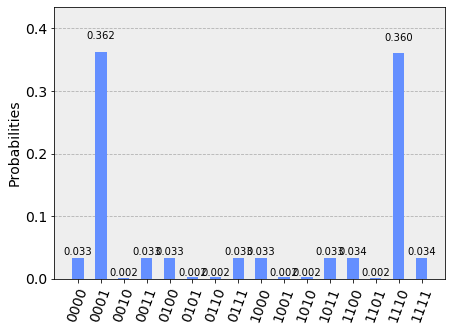

In [4]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc,backend,shots=100000)
result = job.result()
count = result.get_counts()
plot_histogram(count)